In [133]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import scipy

np.random.seed(0)

In [134]:
training = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [135]:
training = training.iloc[:, 1:]

In [136]:
test = test.iloc[:, 1:]

In [137]:
def onehot_feature(pd_data, column_name):
    # Retrieve the unique values (the categories) and an index for each sample
    # specifying the sample category (values[value_idx] reconstruct the original array)
    col_values = pd_data[column_name].to_numpy().astype('<U')
    values, value_idx = np.unique(col_values, return_inverse=True)
    n_values = values.size
    # Create a temporary identity matrix to convert value_idx into one-hot features
    onehots = np.eye(n_values) #when you use an array to index another array in NumPy, it selects rows from the indexed array based on the values in the index array. e[a] selects rows from the identity matrix e based on the values in array a
    value_onehot = onehots[value_idx]
    # Remove the categorical feature
    pd_data = pd_data.drop(column_name, axis=1)
    # Add the new featues
    for i in range(n_values):
        pd_data["{}_{}".format(column_name, values[i])] = value_onehot[:, i]
        
    return pd_data

# Convert famhist into a one-hot encoding
training = onehot_feature(training, 'Kingdom')
training = onehot_feature(training, 'DNAtype')

test = onehot_feature(test, 'Kingdom')
test = onehot_feature(test, 'DNAtype')

In [120]:
from sklearn.linear_model import LinearRegression

In [89]:
from sklearn.linear_model import LinearRegression  # 1- model selection
model = LinearRegression(fit_intercept=True)       # 2- hyperparams
model.fit(X, y)                                    # 3- model fitting
y_predict = model.predict(X)                       # 4- model testing

LinearRegression()

In [90]:
print("The intercept is {:0.3f}".format(model.intercept_))
for idx, col_name in enumerate(X_features):
    print("The coefficient for {} is {:0.3f}".format(col_name, model.coef_[idx]))

The intercept is 1.000
The coefficient for UUU is -1.000
The coefficient for UUC is -1.000
The coefficient for UUA is -1.000
The coefficient for UUG is -1.000
The coefficient for CUU is -1.000
The coefficient for CUC is -1.000
The coefficient for CUA is -1.000
The coefficient for CUG is -1.000
The coefficient for AUU is -1.000
The coefficient for AUC is -1.000
The coefficient for AUA is -1.000
The coefficient for AUG is -1.000
The coefficient for GUU is -1.000
The coefficient for GUC is -1.000
The coefficient for GUA is -1.000
The coefficient for GUG is -1.000
The coefficient for GCU is -1.000
The coefficient for GCC is -1.000
The coefficient for GCA is -1.000
The coefficient for GCG is -1.000
The coefficient for CCU is -1.000
The coefficient for CCC is -1.000
The coefficient for CCA is -1.000
The coefficient for CCG is -1.000
The coefficient for UGG is -1.000
The coefficient for GGU is -1.000
The coefficient for GGC is -1.000
The coefficient for GGA is -1.000
The coefficient for GGG i

In [91]:
from sklearn.metrics import r2_score, mean_squared_error
print("R2 score ", r2_score(y, y_predict))
print("MSE score ", mean_squared_error(y, y_predict))

R2 score  0.9999803188956894
MSE score  1.4547727981251122e-09


In [92]:
from sklearn.model_selection import train_test_split

mpg_test_size = 0.3
mpg_test_seed = 40
# Split X and y into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=mpg_test_size, random_state=mpg_test_seed)
print("X_train.shape ", X_train.shape)
print("X_test.shape ", X_test.shape)

X_train.shape  (7295, 63)
X_test.shape  (3127, 63)


In [93]:
from sklearn.linear_model import LinearRegression

# Fit the LinearRegression predictor
model = LinearRegression(fit_intercept=True) # 1- hyperparams selection
model = model.fit(X_train, y_train)          # 2- model fitting
y_predict_test = model.predict(X_test)       # 3- prediction
y_predict_train = model.predict(X_train)


print("Train R2 score ", r2_score(y_train, y_predict_train))
print("Train MSE score ", mean_squared_error(y_train, y_predict_train))

print("Test R2 score ", r2_score(y_test, y_predict_test))
print("Test MSE score ", mean_squared_error(y_test, y_predict_test))

Train R2 score  0.9999774249350981
Train MSE score  1.673209795188329e-09
Test R2 score  0.9999869548030244
Test MSE score  9.581273151633618e-10


In [94]:
X_all_features = X_features

In [95]:
for idx, col_name in enumerate(X_all_features):
    print("The coefficient for {} is {}".format(col_name, model.coef_[idx]))
print("The intercept is {:0.3f}".format(model.intercept_))

The coefficient for UUU is -0.9998877425277433
The coefficient for UUC is -0.9999728724073252
The coefficient for UUA is -0.9999892067161094
The coefficient for UUG is -0.9998885366691053
The coefficient for CUU is -0.9998143179412686
The coefficient for CUC is -0.999918453661987
The coefficient for CUA is -1.000180088877677
The coefficient for CUG is -0.9999432606717271
The coefficient for AUU is -0.9998302155360879
The coefficient for AUC is -1.0000029709439906
The coefficient for AUA is -0.9998762899668048
The coefficient for AUG is -1.0000467428161388
The coefficient for GUU is -0.9999068840910976
The coefficient for GUC is -0.9999496608602991
The coefficient for GUA is -0.9997937404041817
The coefficient for GUG is -0.9998585860452192
The coefficient for GCU is -0.9998536091923018
The coefficient for GCC is -0.9998880844878633
The coefficient for GCA is -0.9999726389739365
The coefficient for GCG is -1.0001131751586139
The coefficient for CCU is -1.000074311485819
The coefficient 

In [96]:
# ===============================================
#        Code from Lab02.01 - 27/03/2024
# 02.01.StatisticalLearningLinearRegression.ipynb
# ===============================================
from scipy.stats import t, f

def rss(y_true, y_pred): #implementation from the last lab session (already exist in SKLearn)
    # First we make sure the shapes are the same
    y_true = y_true.reshape(y_pred.shape)
    return np.sum((y_true - y_pred) ** 2)

def tss(y):
    return np.sum((y - y.mean()) ** 2)

def multiple_least_squares(X, y): #function to train the model using least, last time you implemented by scratch 
    # Helper function that uses scikit-learn models
    # and behaves as the function we implemented in
    # Lab02.01
    model = LinearRegression(fit_intercept=True)
    model.fit(X, y)
    y_pred = model.predict(X)
    betas = [model.intercept_, *model.coef_]
    return betas, y_pred

# Computes coefficient statistcs #this function is doing t test for each feature, and we check to see if there is any statistical evidence that each feature is correlated to the outcome (rejectH0)
def show_stats(X, y, betas, names, alpha=None):
    n_samples, n_features = X.shape
    deg = n_samples-n_features
    
    # If the ones column has not been added
    if X.shape[1] + 1 == betas.shape[0]:
        X = np.concatenate([np.ones([X.shape[0], 1]), X], axis=-1)
    
    # Compute the prediction
    pred = X.dot(betas).reshape(-1)
    betas = betas.reshape(-1)
    y = y.reshape(-1)
    RSE = ((y-pred)**2).sum()/(n_samples - n_features)

    # Compute the t statistics
    se2_b = RSE*(np.linalg.inv(np.dot(X.T, X)).diagonal())
    se_b = np.sqrt(se2_b)
    t_stat_b = (betas - 0) / se_b

    # Compute the p-value
    p_values = np.array([2*t.sf(np.abs(t_stat), deg) for t_stat in t_stat_b])
    
    df = pd.DataFrame()
    df["Name"] = names
    df["Coefficients"] = betas
    df["Standard Errors"] = se_b
    df["t-stat"] = t_stat_b
    df["p-value"] = p_values
    if alpha:
        rejectH0 = p_values < alpha
        df["reject H0"] = rejectH0    
    
    RSS = np.sum((y - pred)**2)
    MSE = RSS/y.shape[0]
    #print("RSS: {}".format(RSS))
    
    return df
 
# H0: all features in the subset are equal to 0    #F test, within subset of features at least one is relevant (H0=all features are zero if we accept it none of the feature is usefuk)
def Ftest_restricted(data, y, subset_features):
    # Train the complete model
    X_complete = data.to_numpy()
    y = y.to_numpy()
    n = X_complete.shape[0]
    
    betas_complete, y_pred = multiple_least_squares(X_complete, y)    
    rss_complete = rss(y, y_pred)
    nf_complete = X_complete.shape[1]
    
    # Train the restricted model
    notS = data.columns.difference(subset_features)
    X_restr = data[notS].to_numpy()
    betas_restr, y_pred = multiple_least_squares(X_restr, y)

    rss_restr = rss(y, y_pred)
    nf_restr = X_restr.shape[1]

    q = nf_complete - nf_restr

    # Compute F statistics
    F_num = (rss_restr - rss_complete) / q
    F_den = rss_complete / (n - nf_complete - 1)
    F = F_num / F_den

    # Compute the p-value
    p_value = f.sf(F, q, n - nf_complete - 1)
    return p_value, F

In [97]:
betas = np.array([model.intercept_, *model.coef_]).reshape(-1, 1) #single array of all parameters in the model (number of betas and one as a feature)
show_stats(X_train, y_train, betas, ['Intercept', *X_all_features], alpha=0.001) #increasing number of features probability of making an error is increasing, with 100 features, we have 100% of probability of making at least one error

,Name,Coefficients,Standard Errors,t-stat,p-value,reject H0
0,Intercept,0.999953,0.000105,9506.412864,0.0,True
1,UUU,-0.999888,0.000113,-8875.864563,0.0,True
2,UUC,-0.999973,0.000130,-7693.710812,0.0,True
3,UUA,-0.999989,0.000123,-8137.166932,0.0,True
4,UUG,-0.999889,0.000133,-7542.390709,0.0,True
...,...,...,...,...,...,...
59,GAA,-1.000030,0.000132,-7563.516316,0.0,True
60,GAG,-0.999925,0.000127,-7865.184266,0.0,True
61,UAA,-0.999908,0.000113,-8855.942489,0.0,True
62,UAG,-0.999163,0.000559,-1787.584878,0.0,True


In [98]:
alpha = 0.001 #to check if at least one of the features is useful we perform a F-test, and be sure to safely remove them

X_train_pd = pd.DataFrame(X_train, columns=X_all_features)
y_train_pd = pd.DataFrame(y_train)

features = X_all_features[1:64]

p_value, F = Ftest_restricted(X_train_pd, y_train_pd, features)
print("p-value =", p_value)
print("F-stat =", F)
if p_value < alpha: #if p values is below alpha we reject the null hypothesis
    print("Reject H0: There is evidence to say that at least one of the S features is useful")
else:
    print("Do not Reject H0: There is NO evidence to say that at least one of the S features is useful")
    #we got the same but alpha value doesn't chnage as we add some more features

p-value = 0.0
F-stat = 5109983.377626093
Reject H0: There is evidence to say that at least one of the S features is useful


In [99]:
X_features = features
X = training[X_features].to_numpy()
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X, y,
                                                                test_size=mpg_test_size, 
                                                                random_state=mpg_test_seed)

model = LinearRegression()                       # 1- hyperparams selection
model = model.fit(X_train_small, y_train)        # 2- model fitting
y_predict_test = model.predict(X_test_small)     # 3- prediction
y_predict_train = model.predict(X_train_small)


print("Train R2 score ", r2_score(y_train, y_predict_train))
print("Train MSE score ", mean_squared_error(y_train, y_predict_train))

print("Test R2 score ", r2_score(y_test, y_predict_test))
print("Test MSE score ", mean_squared_error(y_test, y_predict_test))

Train R2 score  0.754058515881156
Train MSE score  1.8228594338875823e-05
Test R2 score  0.741824658088593
Test MSE score  1.8962139678599185e-05


In [100]:
from sklearn.preprocessing import PolynomialFeatures

# Transform each feature into polynomial features based on the degree.
# Eg: in case of degree 2 we have the original features plus the product of each pair of features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly = poly.fit(X_train_small)

# Applies the transformation
X_train_poly = poly.transform(X_train_small)
X_test_poly = poly.transform(X_test_small)

# With degree 2 we have: x1,x2,x3,x1x1,x1x2,x1x3,x2x2,x2x3,x3x3
print("X_train_small.shape", X_train_small.shape, " X_poly_train.shape", X_train_poly.shape)
print("X_train_small.shape", X_test_small.shape, " X_poly_train.shape", X_test_poly.shape)

X_train_small.shape (7295, 62)  X_poly_train.shape (7295, 2015)
X_train_small.shape (3127, 62)  X_poly_train.shape (3127, 2015)


In [101]:
# Fit the LinearRegression predictor
model = LinearRegression(fit_intercept=True)           
model.fit(X_train_poly, y_train_small)
y_predict = model.predict(X_test_poly)

LinearRegression()

In [59]:

print("R2 score ", r2_score(y_test_small, y_predict))
print("MSE score ", mean_squared_error(y_test_small, y_predict))

R2 score  0.9999555128977478
MSE score  3.2674330575370298e-09


In [63]:
# Split the previous training set into two sets: train + validation
# In this case we create a validation set having the same size of the test set (it is a choice)
X_trainR_small, X_val_small, y_trainR, y_val = train_test_split(X_train_small, y_train_small, test_size=y_test.shape[0] ,random_state=mpg_test_seed)

In [64]:
from sklearn.pipeline import Pipeline

degree = list(range(1,5))
test_scores = np.zeros(len(degree))
val_scores = np.zeros(len(degree))
train_scores = np.zeros(len(degree))

# Validation
for i, d in enumerate(degree):
    
    model = Pipeline([('poly', PolynomialFeatures(degree=d, include_bias=False)),
                      ('linear', LinearRegression(fit_intercept=True))])
    
    model = model.fit(X_trainR_small, y_trainR)
    
    y_predict = model.predict(X_val_small)
    val_score = r2_score(y_val, y_predict)
    y_predict = model.predict(X_test_small)
    test_score = r2_score(y_test_small, y_predict)
    y_predict = model.predict(X_trainR_small)
    train_score = r2_score(y_trainR, y_predict)
    
    val_scores[i] = val_score
    test_scores[i] = test_score
    train_scores[i] = train_score

# Identifies which is the best degree
best_model_idx = np.argmax(val_scores)
best_degree = degree[best_model_idx]
# And the corresponding (best) validation score
best_val_score = val_scores[best_model_idx]
print("Best degree: ", best_degree,
      "\nVal score: ", best_val_score)

# Train again the Pipeline using the best parameter and the whole training set
model = Pipeline([('poly', PolynomialFeatures(degree=best_degree, include_bias=False)),
                  ('linear', LinearRegression(fit_intercept=True))])
# Note: we train on X_trainR_small + X_val
model = model.fit(X_train_small, y_train_small)
y_predict = model.predict(X_test_small)
test_score = r2_score(y_test_small, y_predict)

print("Test score:", test_score)


KeyboardInterrupt: 

In [ ]:
_ = plt.plot(degree,val_scores, label="val score", color="blue")
_ = plt.plot(degree, train_scores, label="train score", color="g")
_ = plt.plot(degree, test_scores, label="test score", color="orange")
_ = plt.plot([best_degree], [best_val_score], marker="x")
plt.legend()

In [ ]:
from sklearn.model_selection import cross_val_score

In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

# NOTE: same code as before, we just changed the way we
# compute the validation score. Instead on a single fold,
# we use a cross validation score for each possibility!
# Look at how 'val_score' is computed!
# NOTE: We don't need to explicitely train the model, the
# function will do it for us for each train split. Also
# train scores are not reported, only the cv score!
# ======================================================

# NOTE: The API always maximises the score, so score that
# must be minimized are retured as negative values!
r2_scorer = make_scorer(r2_score, greater_is_better=True)

# or ...
# mse_scorer = 'neg_mean_squared_error'

degree = list(range(1,5))
val_scores = np.zeros(len(degree))
# Validation
for i, d in enumerate(degree):
    model = Pipeline([('poly', PolynomialFeatures(degree=d, include_bias=False)),
                      ('linear', LinearRegression(fit_intercept=True))])
    scores = cross_val_score(model, X_train_small, y_train, scoring=r2_scorer, cv=3)
    val_scores[i] = np.mean(scores)

# Identifies which is the best degree
best_model_idx = np.argmax(val_scores) #this to identify the best model, with the highest score
best_degree = degree[best_model_idx] #this is to save the degree of the best model
# And the corresponding (best) validation score
best_val_score = val_scores[best_model_idx]
print("Best degree: ", best_degree,
      "\nVal score: ", best_val_score)
    
    
# Train again the Pipeline using the best parameter and the whole training set
model = Pipeline([('poly', PolynomialFeatures(degree=best_degree, include_bias=False)),
                  ('linear', LinearRegression(fit_intercept=True))])
# Note: we train on X_train_small 
model = model.fit(X_train_small, y_train_small)
y_predict = model.predict(X_test_small)
test_score = r2_score(y_test_small, y_predict)

print("Test score:", test_score)

_ = plt.plot(degree, val_scores, label="cv score", color="blue")
_ = plt.plot(degree, train_scores, label="train score", color="green")
_ = plt.plot(degree, test_scores, label="test score", color="orange")
_ = plt.plot([best_degree], [best_val_score], marker="x")
plt.legend()

ValueError: 
All the 3 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\39388\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\39388\miniconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\39388\miniconda3\Lib\site-packages\sklearn\pipeline.py", line 475, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "C:\Users\39388\miniconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\39388\miniconda3\Lib\site-packages\sklearn\linear_model\_base.py", line 593, in fit
    X, y, X_offset, y_offset, X_scale = _preprocess_data(
                                        ^^^^^^^^^^^^^^^^^
  File "C:\Users\39388\miniconda3\Lib\site-packages\sklearn\linear_model\_base.py", line 164, in _preprocess_data
    X = check_array(X, copy=copy, accept_sparse=["csr", "csc"], dtype=FLOAT_DTYPES)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\39388\miniconda3\Lib\site-packages\sklearn\utils\validation.py", line 1060, in check_array
    array = _asarray_with_order(
            ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\39388\miniconda3\Lib\site-packages\sklearn\utils\_array_api.py", line 519, in _asarray_with_order
    array = numpy.array(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
numpy.core._exceptions._ArrayMemoryError: Unable to allocate 1.66 GiB for an array with shape (4863, 45759) and data type float64

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\39388\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\39388\miniconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\39388\miniconda3\Lib\site-packages\sklearn\pipeline.py", line 475, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "C:\Users\39388\miniconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\39388\miniconda3\Lib\site-packages\sklearn\linear_model\_base.py", line 593, in fit
    X, y, X_offset, y_offset, X_scale = _preprocess_data(
                                        ^^^^^^^^^^^^^^^^^
  File "C:\Users\39388\miniconda3\Lib\site-packages\sklearn\linear_model\_base.py", line 164, in _preprocess_data
    X = check_array(X, copy=copy, accept_sparse=["csr", "csc"], dtype=FLOAT_DTYPES)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\39388\miniconda3\Lib\site-packages\sklearn\utils\validation.py", line 1060, in check_array
    array = _asarray_with_order(
            ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\39388\miniconda3\Lib\site-packages\sklearn\utils\_array_api.py", line 519, in _asarray_with_order
    array = numpy.array(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
numpy.core._exceptions._ArrayMemoryError: Unable to allocate 1.66 GiB for an array with shape (4864, 45759) and data type float64


In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
from sklearn.model_selection import GridSearchCV

# Validation
model = Pipeline([('poly', PolynomialFeatures(degree=1, include_bias=False)),
                  ('linear', LinearRegression(fit_intercept=True))])

# Select parameters to optimize
parameters = {'poly__degree': list(range(1,5))}
              #'linear__fit_intercept': [True, False],
              #'linear__normalize': [True, False]}

cv = GridSearchCV(model, parameters, scoring=r2_scorer, cv=3, refit=True)
cv.fit(X_train_small, y_train_small)

C:\Users\39388\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
6 fits failed out of a total of 12.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\39388\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\39388\miniconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\39388\miniconda3\Lib\site-packages\sklearn\pipeline.py", line 475, in fit
    self._final_estimator.f

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('poly',
                                        PolynomialFeatures(degree=1,
                                                           include_bias=False)),
                                       ('linear', LinearRegression())]),
             param_grid={'poly__degree': [1, 2, 3, 4]},
             scoring=make_scorer(r2_score, response_method='predict'))

In [68]:
# Retrieve the best **trained** estimator
cv.best_estimator_
# Retrieve its parameters
cv.best_params_
# Retrieve the best **CV** score
# I.e., mean of the scores on each fold
cv.best_score_

Pipeline(steps=[('poly', PolynomialFeatures(degree=1, include_bias=False)),
                ('linear', LinearRegression())])

{'poly__degree': 1}

0.9999766935080894

In [69]:
model = cv.best_estimator_
y_predict = model.predict(X_test_small)
test_score = r2_score(y_test_small, y_predict)

print("Best degree:", cv.best_params_['poly__degree'])
print("Train score:", cv.best_score_)
print("Test score:", test_score)

Best degree: 1
Train score: 0.9999766935080894
Test score: 0.9999869548030244


In [70]:
# Convert back from numpy arrays to data frames
# just for convenience, since we can use names to
# index features
X_train_pd = pd.DataFrame(X_train, columns=X_all_features)
X_test_pd = pd.DataFrame(X_test, columns=X_all_features)

In [71]:
#to create subsets we will use itertools
#This function generates all possible combinations of a specified length from the elements of an iterable
import itertools 
lst=['a','b','c','d']
list(itertools.combinations(lst, 2))

[('a', 'b'), ('a', 'c'), ('a', 'd'), ('b', 'c'), ('b', 'd'), ('c', 'd')]

In [ ]:
#creation of subsets
import itertools
def get_subsets(X_pd, dim):
    feature_names = X_pd.columns.tolist()
    # Compute all possible combinations of 'dim' values
    subset_names = itertools.combinations(feature_names, dim) # list of list of names [[name of first candidate, ...], [...]]
    # Convert names into datasets
    data_subsets = [X_pd[list(fnames)] for fnames in subset_names] #For each combination of feature names, it selects the corresponding columns from the original DataFrame X_pd, effectively creating subsets of the original data.
    return data_subsets

subsets = get_subsets(X_train_pd, 3)
subsets[0].head() # training set of the first subset
subsets[1].head() # training set of the second subset

In [72]:
#This code defines a function get_evaluator that takes a scorer function as input and returns another function called evaluator.
#The purpose of get_evaluator is to create an "evaluator" function that can apply the provided scorer to evaluate models.
def get_evaluator(scorer): 
    def evaluator(model, X, y, trained=False): #nested function that takes a model, X, y, and an optional trained parameter. The trained parameter is used to indicate if the model has already been trained.
        if not trained:
            model = model.fit(X, y)
        score = scorer(model, X, y)
        return model, score
    return evaluator    

In [73]:
from sklearn.dummy import DummyRegressor

#step 0: PREPARATION

def subset_selection(Xtrain_pd, ytrain, Xtest_pd, ytest,
                     candidates_evaluator, candidates_argbest, # Metric to be used at 2.b
                     subsets_evaluator, subsets_argbest,       # Metric to be used at 3
                     test_evaluator=None, test_argbest=None, # Metric to be used on the test set
                     candidates_scorer_name=None,  # Name of 2. figure
                     subsets_scorer_name=None,     # Name of 3. figure
                     verbose=True, weight_step3=0):  
    test_evaluator = subsets_evaluator if not test_evaluator else test_evaluator
    test_argbest = subsets_argbest if not test_argbest else test_argbest
    
    # Global variable init
    # ====================
    num_features = Xtrain_pd.shape[-1]
    best_candidate_metric = []
    # subsets_* are lists containing one value for each Mk model (the best of the Mk candidates)
    subsets_test = [] 
    subsets_metric = []        # The best metric of each subset of dimension 'dim'
    subsets_best_features = [] # The best features combination in each subset of dimension 'dim'
    # A figure to keep track of candidates scores in each Mk subset
    plt.figure()
    candidate_fig = plt.subplot(111) # A global matplotlib figure
    num_evaluations = 0        # A counter to keep track of the total number of trials
    
#step 1 e 2: baseline model and candidates    
    
    # 1. and 2. Evaluate all Mk candidates with
    #           k=0...P features
    #Loop over the range of the number of features.
    #For each dimension, generate subsets of features using get_subsets.
    #Train models on each subset (if not empty), evaluate them using candidates_evaluator, and keep track of metrics.
    #Select the best candidate for each dimension using candidates_argbest.
    #Compute the metric for step 3 using the selected best candidate.
    # =========================================
    for dim in range(num_features+1): #gr through all the numbers of features
        candidate_metrics = [] # Keep track of candidates metrics. Will be used to select the best
        candidate_models = []  # Keep track of candidates trained models
        
        # 2.a Fixed the number of features 'dim', look at
        #     all the possible candidate models with that
        #     cardinality
        # ===============================================
        dim_subsets = get_subsets(X_train_pd, dim)
        for Xtrain_sub in dim_subsets:
            
            # Train the model on the subset
            if Xtrain_sub.shape[-1] == 0:
                # 1. Train the M0 model if the number of
                #    features is zero!
                # ======================================
                model = DummyRegressor()   #M0 #median Y, model with no features
            else:
                model = LinearRegression(fit_intercept=True)
            
            model, score = candidates_evaluator(model, Xtrain_sub, ytrain) #train the model and perfrom the evaluatiom
            candidate_models.append(model) #we collect all the models and scores
            candidate_metrics.append(score)
            num_evaluations += 1
            
        _ = candidate_fig.scatter([dim]*len(candidate_metrics), candidate_metrics,
                                  color="b") #plotting the scores of all the models
            
        # 2.b Select the best candidate among those using
        #     the same number of features (2.a)
        # ===============================================
        idx_best_candidate = candidates_argbest(candidate_metrics)
        # Save best candidate features
        best_features = dim_subsets[idx_best_candidate].columns.tolist()
        best_candidate_metric.append(candidate_metrics[idx_best_candidate])
        subsets_best_features.append(best_features)
        
        # Compute metric for step 3.
        best_subset_model = candidate_models[idx_best_candidate]
        best_subset_Xtrain = dim_subsets[idx_best_candidate]
        _, score = subsets_evaluator(best_subset_model, best_subset_Xtrain, ytrain, trained=True)
        subsets_metric.append(score)
        best_subset_Xtest = Xtest_pd[best_subset_Xtrain.columns.tolist()]
        _, score = test_evaluator(best_subset_model, best_subset_Xtest, ytest, trained=True)
        subsets_test.append(score)
        num_evaluations += 0
        
        if verbose:
            print("............")
            print("Best model (M{}) with {} features: {}".format(dim, dim, best_features))
            print("M{} subset score (3.): {}".format(dim, score))
        
    # 3. Among all best candidates with increasing number
    #    of features, select the best one
    # ===================================================
    best_subset_idx = subsets_argbest(subsets_metric)
    best_features = subsets_best_features[best_subset_idx]
    
    if verbose:
        print("\n\nBest configuration has {} features".format(best_subset_idx))
        print("Features: {}".format(subsets_best_features[best_subset_idx]))
        print("Total number of trained models:", num_evaluations)
    
    # Complete the subsets_fig figure by plotting
    # a line connecting all best candidate score
    best_candidate_score_idx = candidates_argbest(best_candidate_metric)
    _ = candidate_fig.plot(range(len(best_candidate_metric)), best_candidate_metric)
    _ = candidate_fig.scatter(best_candidate_score_idx, best_candidate_metric[best_candidate_score_idx],
                              marker='X', label="Best", color="r")
    candidate_fig.set_title(candidates_scorer_name)
    candidate_fig.legend()
    
    # Plot a figure to show how the 3. metric evolves
    plt.figure()
    subsets_fig = plt.subplot(111)
    _ = subsets_fig.plot(range(len(subsets_metric)), subsets_metric, label="Selection (3.) scores")
    _ = subsets_fig.scatter(best_subset_idx, subsets_metric[best_subset_idx],
                              marker='X', label="Best (3.) score", color="r")
    best_test_score_idx = test_argbest(subsets_test)
    _ = subsets_fig.plot(range(len(subsets_test)), subsets_test, label="Test scores")
    _ = subsets_fig.scatter(best_test_score_idx, subsets_test[best_test_score_idx],
                              marker='X', label="Best test score", color="y")
    subsets_fig.set_title(subsets_scorer_name)
    subsets_fig.legend()


NameError: name 'get_subsets' is not defined

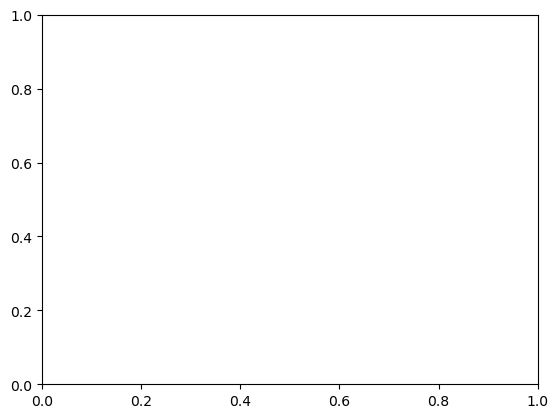

In [74]:
subset_selection(X_train_pd, y_train, X_test_pd, y_test,
                    get_evaluator(make_scorer(mean_squared_error)), np.argmin,   #evaluatore for the step
                    get_evaluator(make_scorer(mean_squared_error)), np.argmin,
                 candidates_scorer_name="MSE",
                 subsets_scorer_name="MSE",
                 verbose=True)

#Try using RSS or R2 as evaluators
subset_selection(X_train_pd, y_train, X_test_pd, y_test,
                  get_evaluator(make_scorer(mean_squared_error)), np.argmax,   #evaluatore for the step
                    get_evaluator(make_scorer(mean_squared_error)), np.argmax,
                 candidates_scorer_name="R2",
                 subsets_scorer_name="R2",
                 verbose=False)

In [75]:
def estimate_sigma(Xtrain_pd, ytrain):
    # Sigma is usually estimated using the model with all features
    n, p = Xtrain_pd.shape
    model = LinearRegression(fit_intercept=True)
    model.fit(Xtrain_pd, ytrain)
    y_pred = model.predict(Xtrain_pd)
    RSS = rss(y_pred, ytrain)
    RSE = np.sqrt(RSS / (n-p))
    return RSE

def cp(y_pred, y_true, n, d, sigma):
    sigma2 = sigma**2
    return (rss(y_pred, y_true) + 2*d*sigma2) / n

def aic(y_pred, y_true, n, d, sigma):
    sigma2 = sigma**2
    return (rss(y_pred, y_true) + 2*d*sigma2) / (n*sigma2)

def bic(y_pred, y_true, n, d, sigma):
    sigma2 = sigma**2
    return (rss(y_pred, y_true) + np.log(n)*d*sigma2) / (n*sigma2)

def adj_r2(y_pred, y_true, n, d, sigma):
    sigma2 = sigma**2
    RSS = rss(y_pred, y_true)
    TSS = tss(y_true)
    return 1 - (RSS/(n-d-1)) / (TSS/(n-1))


NameError: name 'get_subsets' is not defined

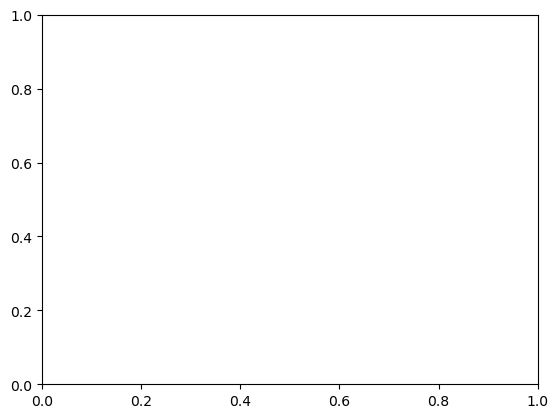

In [76]:
def get_sigma_scorer(metric, sigma):
    def scorer(model, X, y):
        n, d = X.shape
        y_pred = model.predict(X)
        return metric(y_pred, y, n, d, sigma)
    
    return scorer

sigma = estimate_sigma(X_train_pd, y_train)
subset_selection(X_train_pd, y_train, X_test_pd, y_test,
                 get_evaluator(make_scorer(rss)), np.argmin, # 2.
                 get_evaluator(get_sigma_scorer(bic, sigma)), np.argmin, # 3.
                 get_evaluator(make_scorer(mean_squared_error)), np.argmin, # test
                 candidates_scorer_name="RSS",
                 subsets_scorer_name="BIC",
                 verbose=True)

In [77]:
from sklearn.dummy import DummyRegressor

def forward_selection(Xtrain_pd, ytrain, Xtest_pd, ytest,
                      candidates_evaluator, candidates_argbest, # Metric to be used at 2.b
                      subsets_evaluator, subsets_argbest,       # Metric to be used at 3
                      test_evaluator=None, test_argbest=None,
                      candidates_scorer_name=None,  # Name of 2. figure
                      subsets_scorer_name=None,     # Name of 3. figure
                      verbose=True, weight_step3=0):   
    test_evaluator = subsets_evaluator if not test_evaluator else test_evaluator
    test_argbest = subsets_argbest if not test_argbest else test_argbest
    
    # Global variable init
    # ====================
    num_features = Xtrain_pd.shape[-1]
    best_candidate_metric = []
    # subsets_* are lists containing one value for each Mk model (the best of the Mk candidates)
    subsets_test = []
    subsets_metric = []        # The best metric of each subset of dimension 'dim'
    subsets_best_features = [] # The best features combination in each subset of dimension 'dim'
    # A figure to keep track of candidates scores in each Mk subset
    plt.figure()
    candidate_fig = plt.subplot(111) # A global matplotlib figure
    num_evaluations = 0        # A conter to keep track of the total number of trials
    
    selected_features = []  # <------ !! We keep track of selected features !!
    all_features = Xtrain_pd.columns
    
    
    # 1. Train M0
    # ===========
    model = DummyRegressor()
    # Compute (2.b) metrics
    model, score = candidates_evaluator(model, Xtrain_pd[[]], ytrain)
    best_candidate_metric.append(score)
    subsets_best_features.append([])
    _ = candidate_fig.scatter([0], [score], color="b")
    # Compute metric for step 3.
    _, score = subsets_evaluator(model, Xtrain_pd[[]], ytrain, trained=True)
    subsets_metric.append(score)
    _, score = test_evaluator(model, Xtrain_pd[[]], ytrain, trained=True)
    subsets_test.append(score)
    
    # 2. Evaluate all Mk candidates with
    #    k=0...P features
    # =========================================
    #!! The loop condition is slightly changed
    #!! How many iterations we need to perform?
    for dim in range(num_features):
        candidate_metrics = [] # Keep track of candidates metrics. Will be used to select the best
        candidate_models = []  # Keep track of candidates trained models
        
        # 2.a Given the previous Mk model, test remaining
        # features and select the one providing the best
        # performance increment
        # ===============================================
        remaining_features = Xtrain_pd.columns.difference(selected_features)
        
        for new_column in remaining_features:
            Xtrain_sub = Xtrain_pd[selected_features+[new_column]].to_numpy()
            model = LinearRegression(fit_intercept=True)
            model, score = candidates_evaluator(model, Xtrain_sub, ytrain)
            candidate_models.append(model)
            candidate_metrics.append(score)
            num_evaluations += 1
            
        _ = candidate_fig.scatter([Xtrain_sub.shape[-1]]*len(candidate_metrics), candidate_metrics,
                                  color="b")
            
        # 2.b Select the best candidate in (2.a)
        # ===============================================
        idx_best_candidate = candidates_argbest(candidate_metrics)
        #!!! Update selected feature
        # ==========================
        selected_features.append(remaining_features[idx_best_candidate])
        # Save best candidate features
        best_candidate_metric.append(candidate_metrics[idx_best_candidate])
        best_features = selected_features.copy()
        subsets_best_features.append(best_features)
        
        # Compute metric for step 3.
        best_subset_model = candidate_models[idx_best_candidate]
        best_subset_Xtrain = Xtrain_pd[best_features].to_numpy()
        _, score = subsets_evaluator(best_subset_model, best_subset_Xtrain, ytrain, trained=True)
        subsets_metric.append(score)
        best_subset_Xtest = Xtest_pd[best_features].to_numpy()
        _, score_test = test_evaluator(best_subset_model, best_subset_Xtest, ytest, trained=True)
        subsets_test.append(score_test)
        num_evaluations += weight_step3 
        
        if verbose:
            print("............")
            print("Best model (M{}) with {} features: {}".format(dim, dim+1, best_features))
            print("M{} subset score (3.): {}".format(dim, score))
        
    # 3. Among all best candidates with increasing number
    #    of features, select the best one
    # ===================================================
    best_subset_idx = subsets_argbest(subsets_metric)
    best_features = subsets_best_features[best_subset_idx]
    
    if verbose:
        print("\n\nBest configuration has {} features".format(best_subset_idx))
        print("Features: {}".format(subsets_best_features[best_subset_idx]))
        print("Total number of trained models:", num_evaluations)
    
    # Complete the subsets_fig figure by plotting
    # a line connecting all best candidate score
    best_candidate_score_idx = candidates_argbest(best_candidate_metric)
    _ = candidate_fig.plot(range(len(best_candidate_metric)), best_candidate_metric)
    _ = candidate_fig.scatter(best_candidate_score_idx, best_candidate_metric[best_candidate_score_idx],
                              marker='X', label="Best", color="r")
    candidate_fig.set_title(candidates_scorer_name)
    candidate_fig.legend()
    
    # Plot a figure to show how te 3. metric evolves
    plt.figure()
    subsets_fig = plt.subplot(111)
    _ = subsets_fig.plot(range(len(subsets_metric)), subsets_metric, label="Selection (3.) scores")
    _ = subsets_fig.scatter(best_subset_idx, subsets_metric[best_subset_idx],
                              marker='X', label="Best (3.) score", color="r")
    best_test_score_idx = test_argbest(subsets_test)
    _ = subsets_fig.plot(range(len(subsets_test)), subsets_test, label="Test scores")
    _ = subsets_fig.scatter(best_test_score_idx, subsets_test[best_test_score_idx],
                              marker='X', label="Best test score", color="y")
    subsets_fig.set_title(subsets_scorer_name)
    subsets_fig.legend()

............
Best model (M0) with 1 features: ['GCC']
M0 subset score (3.): 25866.37047773738
............
Best model (M1) with 2 features: ['GCC', 'AGG']
M1 subset score (3.): 19850.03512670783
............
Best model (M2) with 3 features: ['GCC', 'AGG', 'AAU']
M2 subset score (3.): 17608.055097676814
............
Best model (M3) with 4 features: ['GCC', 'AGG', 'AAU', 'GAA']
M3 subset score (3.): 16571.793955649784
............
Best model (M4) with 5 features: ['GCC', 'AGG', 'AAU', 'GAA', 'CGU']
M4 subset score (3.): 15945.191612153647
............
Best model (M5) with 6 features: ['GCC', 'AGG', 'AAU', 'GAA', 'CGU', 'AUC']
M5 subset score (3.): 15173.361606939794
............
Best model (M6) with 7 features: ['GCC', 'AGG', 'AAU', 'GAA', 'CGU', 'AUC', 'GCA']
M6 subset score (3.): 14740.541225615618
............
Best model (M7) with 8 features: ['GCC', 'AGG', 'AAU', 'GAA', 'CGU', 'AUC', 'GCA', 'Kingdom_vrl']
M7 subset score (3.): 14346.42340384558
............
Best model (M8) with 9 fea

............
Best model (M36) with 37 features: ['GCC', 'AGG', 'AAU', 'GAA', 'CGU', 'AUC', 'GCA', 'Kingdom_vrl', 'GGA', 'Kingdom_inv', 'DNAtype_2', 'CUA', 'ACG', 'CUU', 'GGC', 'GGG', 'UGC', 'AUU', 'UAC', 'AUA', 'UGG', 'CCC', 'UAU', 'AGC', 'ACA', 'UUC', 'GUG', 'CCA', 'UUG', 'CCG', 'ACU', 'CGA', 'Kingdom_pln', 'DNAtype_11', 'GAC', 'GGU', 'GAG']
M36 subset score (3.): 11154.857476355308
............
Best model (M37) with 38 features: ['GCC', 'AGG', 'AAU', 'GAA', 'CGU', 'AUC', 'GCA', 'Kingdom_vrl', 'GGA', 'Kingdom_inv', 'DNAtype_2', 'CUA', 'ACG', 'CUU', 'GGC', 'GGG', 'UGC', 'AUU', 'UAC', 'AUA', 'UGG', 'CCC', 'UAU', 'AGC', 'ACA', 'UUC', 'GUG', 'CCA', 'UUG', 'CCG', 'ACU', 'CGA', 'Kingdom_pln', 'DNAtype_11', 'GAC', 'GGU', 'GAG', 'CCU']
M37 subset score (3.): 11131.748078772674
............
Best model (M38) with 39 features: ['GCC', 'AGG', 'AAU', 'GAA', 'CGU', 'AUC', 'GCA', 'Kingdom_vrl', 'GGA', 'Kingdom_inv', 'DNAtype_2', 'CUA', 'ACG', 'CUU', 'GGC', 'GGG', 'UGC', 'AUU', 'UAC', 'AUA', 'UGG', '

............
Best model (M55) with 56 features: ['GCC', 'AGG', 'AAU', 'GAA', 'CGU', 'AUC', 'GCA', 'Kingdom_vrl', 'GGA', 'Kingdom_inv', 'DNAtype_2', 'CUA', 'ACG', 'CUU', 'GGC', 'GGG', 'UGC', 'AUU', 'UAC', 'AUA', 'UGG', 'CCC', 'UAU', 'AGC', 'ACA', 'UUC', 'GUG', 'CCA', 'UUG', 'CCG', 'ACU', 'CGA', 'Kingdom_pln', 'DNAtype_11', 'GAC', 'GGU', 'GAG', 'CCU', 'CAA', 'GUU', 'CUC', 'UUU', 'AAC', 'UAA', 'CGC', 'GCU', 'ACC', 'CAU', 'CAG', 'UCG', 'UUA', 'AAG', 'GAU', 'CAC', 'CGG', 'AAA']
M55 subset score (3.): 9808.027072325178
............
Best model (M56) with 57 features: ['GCC', 'AGG', 'AAU', 'GAA', 'CGU', 'AUC', 'GCA', 'Kingdom_vrl', 'GGA', 'Kingdom_inv', 'DNAtype_2', 'CUA', 'ACG', 'CUU', 'GGC', 'GGG', 'UGC', 'AUU', 'UAC', 'AUA', 'UGG', 'CCC', 'UAU', 'AGC', 'ACA', 'UUC', 'GUG', 'CCA', 'UUG', 'CCG', 'ACU', 'CGA', 'Kingdom_pln', 'DNAtype_11', 'GAC', 'GGU', 'GAG', 'CCU', 'CAA', 'GUU', 'CUC', 'UUU', 'AAC', 'UAA', 'CGC', 'GCU', 'ACC', 'CAU', 'CAG', 'UCG', 'UUA', 'AAG', 'GAU', 'CAC', 'CGG', 'AAA', 'AU

............
Best model (M70) with 71 features: ['GCC', 'AGG', 'AAU', 'GAA', 'CGU', 'AUC', 'GCA', 'Kingdom_vrl', 'GGA', 'Kingdom_inv', 'DNAtype_2', 'CUA', 'ACG', 'CUU', 'GGC', 'GGG', 'UGC', 'AUU', 'UAC', 'AUA', 'UGG', 'CCC', 'UAU', 'AGC', 'ACA', 'UUC', 'GUG', 'CCA', 'UUG', 'CCG', 'ACU', 'CGA', 'Kingdom_pln', 'DNAtype_11', 'GAC', 'GGU', 'GAG', 'CCU', 'CAA', 'GUU', 'CUC', 'UUU', 'AAC', 'UAA', 'CGC', 'GCU', 'ACC', 'CAU', 'CAG', 'UCG', 'UUA', 'AAG', 'GAU', 'CAC', 'CGG', 'AAA', 'AUG', 'UCU', 'CUG', 'AGU', 'GUC', 'UCA', 'GUA', 'UCC', 'GCG', 'UGU', 'UGA', 'UAG', 'Kingdom_phg', 'DNAtype_3', 'Kingdom_rod']
M70 subset score (3.): 1.075530623447751
............
Best model (M71) with 72 features: ['GCC', 'AGG', 'AAU', 'GAA', 'CGU', 'AUC', 'GCA', 'Kingdom_vrl', 'GGA', 'Kingdom_inv', 'DNAtype_2', 'CUA', 'ACG', 'CUU', 'GGC', 'GGG', 'UGC', 'AUU', 'UAC', 'AUA', 'UGG', 'CCC', 'UAU', 'AGC', 'ACA', 'UUC', 'GUG', 'CCA', 'UUG', 'CCG', 'ACU', 'CGA', 'Kingdom_pln', 'DNAtype_11', 'GAC', 'GGU', 'GAG', 'CCU', 'C

............
Best model (M82) with 83 features: ['GCC', 'AGG', 'AAU', 'GAA', 'CGU', 'AUC', 'GCA', 'Kingdom_vrl', 'GGA', 'Kingdom_inv', 'DNAtype_2', 'CUA', 'ACG', 'CUU', 'GGC', 'GGG', 'UGC', 'AUU', 'UAC', 'AUA', 'UGG', 'CCC', 'UAU', 'AGC', 'ACA', 'UUC', 'GUG', 'CCA', 'UUG', 'CCG', 'ACU', 'CGA', 'Kingdom_pln', 'DNAtype_11', 'GAC', 'GGU', 'GAG', 'CCU', 'CAA', 'GUU', 'CUC', 'UUU', 'AAC', 'UAA', 'CGC', 'GCU', 'ACC', 'CAU', 'CAG', 'UCG', 'UUA', 'AAG', 'GAU', 'CAC', 'CGG', 'AAA', 'AUG', 'UCU', 'CUG', 'AGU', 'GUC', 'UCA', 'GUA', 'UCC', 'GCG', 'UGU', 'UGA', 'UAG', 'Kingdom_phg', 'DNAtype_3', 'Kingdom_rod', 'Kingdom_arc', 'Kingdom_mam', 'DNAtype_6', 'Kingdom_plm', 'DNAtype_12', 'DNAtype_0', 'Kingdom_vrt', 'DNAtype_5', 'DNAtype_9', 'Kingdom_bct', 'Ncodons', 'DNAtype_4']
M82 subset score (3.): 1.0894147211247864
............
Best model (M83) with 84 features: ['GCC', 'AGG', 'AAU', 'GAA', 'CGU', 'AUC', 'GCA', 'Kingdom_vrl', 'GGA', 'Kingdom_inv', 'DNAtype_2', 'CUA', 'ACG', 'CUU', 'GGC', 'GGG', 'UGC'

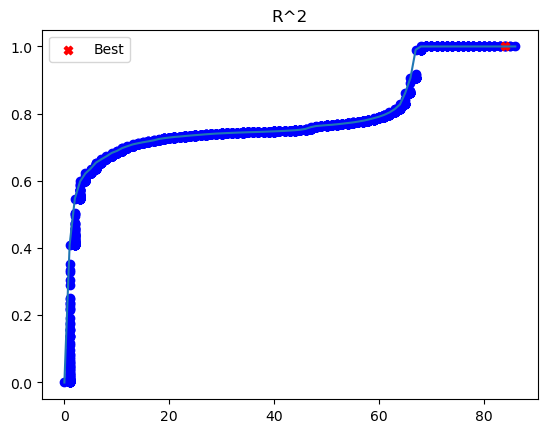

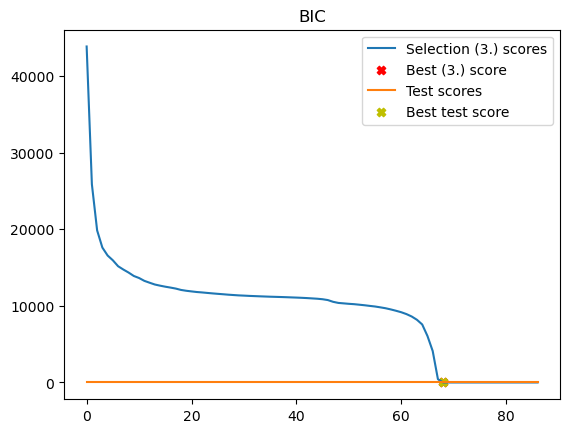

In [78]:
forward_selection(X_train_pd, y_train, X_test_pd, y_test,
                  get_evaluator(make_scorer(r2_score)), np.argmax, # 2.
                  get_evaluator(get_sigma_scorer(bic, sigma)), np.argmin, # 3.
                  get_evaluator(make_scorer(mean_squared_error)), np.argmin, # test
                  candidates_scorer_name="R^2",
                  subsets_scorer_name="BIC",
                  verbose=True)

............
Best model (M0) with 1 features: ['GCC']
M0 subset score (3.): 0.4089722682678133
............
Best model (M1) with 2 features: ['GCC', 'AGG']
M1 subset score (3.): 0.5456353161970348
............
Best model (M2) with 3 features: ['GCC', 'AGG', 'AAU']
M2 subset score (3.): 0.5971789428573699
............
Best model (M3) with 4 features: ['GCC', 'AGG', 'AAU', 'GAA']
M3 subset score (3.): 0.6205045709388405
............
Best model (M4) with 5 features: ['GCC', 'AGG', 'AAU', 'GAA', 'CGU']
M4 subset score (3.): 0.6346225601388608
............
Best model (M5) with 6 features: ['GCC', 'AGG', 'AAU', 'GAA', 'CGU', 'AUC']
M5 subset score (3.): 0.6523574911170673
............
Best model (M6) with 7 features: ['GCC', 'AGG', 'AAU', 'GAA', 'CGU', 'AUC', 'GCA']
M6 subset score (3.): 0.662146253117291
............
Best model (M7) with 8 features: ['GCC', 'AGG', 'AAU', 'GAA', 'CGU', 'AUC', 'GCA', 'Kingdom_vrl']
M7 subset score (3.): 0.6712206464055473
............
Best model (M8) with 9 f

............
Best model (M36) with 37 features: ['GCC', 'AGG', 'AAU', 'GAA', 'CGU', 'AUC', 'GCA', 'Kingdom_vrl', 'GGA', 'Kingdom_inv', 'DNAtype_2', 'CUA', 'ACG', 'CUU', 'GGC', 'GGG', 'UGC', 'AUU', 'UAC', 'AUA', 'UGG', 'CCC', 'UAU', 'AGC', 'ACA', 'UUC', 'GUG', 'CCA', 'UUG', 'CCG', 'ACU', 'CGA', 'Kingdom_pln', 'DNAtype_11', 'GAC', 'GGU', 'GAG']
M36 subset score (3.): 0.7392905842985098
............
Best model (M37) with 38 features: ['GCC', 'AGG', 'AAU', 'GAA', 'CGU', 'AUC', 'GCA', 'Kingdom_vrl', 'GGA', 'Kingdom_inv', 'DNAtype_2', 'CUA', 'ACG', 'CUU', 'GGC', 'GGG', 'UGC', 'AUU', 'UAC', 'AUA', 'UGG', 'CCC', 'UAU', 'AGC', 'ACA', 'UUC', 'GUG', 'CCA', 'UUG', 'CCG', 'ACU', 'CGA', 'Kingdom_pln', 'DNAtype_11', 'GAC', 'GGU', 'GAG', 'CCU']
M37 subset score (3.): 0.7395888720447462
............
Best model (M38) with 39 features: ['GCC', 'AGG', 'AAU', 'GAA', 'CGU', 'AUC', 'GCA', 'Kingdom_vrl', 'GGA', 'Kingdom_inv', 'DNAtype_2', 'CUA', 'ACG', 'CUU', 'GGC', 'GGG', 'UGC', 'AUU', 'UAC', 'AUA', 'UGG', '

............
Best model (M55) with 56 features: ['GCC', 'AGG', 'AAU', 'GAA', 'CGU', 'AUC', 'GCA', 'Kingdom_vrl', 'GGA', 'Kingdom_inv', 'DNAtype_2', 'CUA', 'ACG', 'CUU', 'GGC', 'GGG', 'UGC', 'AUU', 'UAC', 'AUA', 'UGG', 'CCC', 'UAU', 'AGC', 'ACA', 'UUC', 'GUG', 'CCA', 'UUG', 'CCG', 'ACU', 'CGA', 'Kingdom_pln', 'DNAtype_11', 'GAC', 'GGU', 'GAG', 'CCU', 'CAA', 'GUU', 'CUC', 'UUU', 'AAC', 'UAA', 'CGC', 'GCU', 'ACC', 'CAU', 'CAG', 'UCG', 'UUA', 'AAG', 'GAU', 'CAC', 'CGG', 'AAA']
M55 subset score (3.): 0.7695718026669038
............
Best model (M56) with 57 features: ['GCC', 'AGG', 'AAU', 'GAA', 'CGU', 'AUC', 'GCA', 'Kingdom_vrl', 'GGA', 'Kingdom_inv', 'DNAtype_2', 'CUA', 'ACG', 'CUU', 'GGC', 'GGG', 'UGC', 'AUU', 'UAC', 'AUA', 'UGG', 'CCC', 'UAU', 'AGC', 'ACA', 'UUC', 'GUG', 'CCA', 'UUG', 'CCG', 'ACU', 'CGA', 'Kingdom_pln', 'DNAtype_11', 'GAC', 'GGU', 'GAG', 'CCU', 'CAA', 'GUU', 'CUC', 'UUU', 'AAC', 'UAA', 'CGC', 'GCU', 'ACC', 'CAU', 'CAG', 'UCG', 'UUA', 'AAG', 'GAU', 'CAC', 'CGG', 'AAA', 'A

............
Best model (M70) with 71 features: ['GCC', 'AGG', 'AAU', 'GAA', 'CGU', 'AUC', 'GCA', 'Kingdom_vrl', 'GGA', 'Kingdom_inv', 'DNAtype_2', 'CUA', 'ACG', 'CUU', 'GGC', 'GGG', 'UGC', 'AUU', 'UAC', 'AUA', 'UGG', 'CCC', 'UAU', 'AGC', 'ACA', 'UUC', 'GUG', 'CCA', 'UUG', 'CCG', 'ACU', 'CGA', 'Kingdom_pln', 'DNAtype_11', 'GAC', 'GGU', 'GAG', 'CCU', 'CAA', 'GUU', 'CUC', 'UUU', 'AAC', 'UAA', 'CGC', 'GCU', 'ACC', 'CAU', 'CAG', 'UCG', 'UUA', 'AAG', 'GAU', 'CAC', 'CGG', 'AAA', 'AUG', 'UCU', 'CUG', 'AGU', 'GUC', 'UCA', 'GUA', 'UCC', 'GCG', 'UGU', 'UGA', 'UAG', 'Kingdom_phg', 'DNAtype_3', 'Kingdom_rod']
M70 subset score (3.): 0.9999772814346312
............
Best model (M71) with 72 features: ['GCC', 'AGG', 'AAU', 'GAA', 'CGU', 'AUC', 'GCA', 'Kingdom_vrl', 'GGA', 'Kingdom_inv', 'DNAtype_2', 'CUA', 'ACG', 'CUU', 'GGC', 'GGG', 'UGC', 'AUU', 'UAC', 'AUA', 'UGG', 'CCC', 'UAU', 'AGC', 'ACA', 'UUC', 'GUG', 'CCA', 'UUG', 'CCG', 'ACU', 'CGA', 'Kingdom_pln', 'DNAtype_11', 'GAC', 'GGU', 'GAG', 'CCU', '

............
Best model (M82) with 83 features: ['GCC', 'AGG', 'AAU', 'GAA', 'CGU', 'AUC', 'GCA', 'Kingdom_vrl', 'GGA', 'Kingdom_inv', 'DNAtype_2', 'CUA', 'ACG', 'CUU', 'GGC', 'GGG', 'UGC', 'AUU', 'UAC', 'AUA', 'UGG', 'CCC', 'UAU', 'AGC', 'ACA', 'UUC', 'GUG', 'CCA', 'UUG', 'CCG', 'ACU', 'CGA', 'Kingdom_pln', 'DNAtype_11', 'GAC', 'GGU', 'GAG', 'CCU', 'CAA', 'GUU', 'CUC', 'UUU', 'AAC', 'UAA', 'CGC', 'GCU', 'ACC', 'CAU', 'CAG', 'UCG', 'UUA', 'AAG', 'GAU', 'CAC', 'CGG', 'AAA', 'AUG', 'UCU', 'CUG', 'AGU', 'GUC', 'UCA', 'GUA', 'UCC', 'GCG', 'UGU', 'UGA', 'UAG', 'Kingdom_phg', 'DNAtype_3', 'Kingdom_rod', 'Kingdom_arc', 'Kingdom_mam', 'DNAtype_6', 'Kingdom_plm', 'DNAtype_12', 'DNAtype_0', 'Kingdom_vrt', 'DNAtype_5', 'DNAtype_9', 'Kingdom_bct', 'Ncodons', 'DNAtype_4']
M82 subset score (3.): 0.9999772481242795
............
Best model (M83) with 84 features: ['GCC', 'AGG', 'AAU', 'GAA', 'CGU', 'AUC', 'GCA', 'Kingdom_vrl', 'GGA', 'Kingdom_inv', 'DNAtype_2', 'CUA', 'ACG', 'CUU', 'GGC', 'GGG', 'UGC'

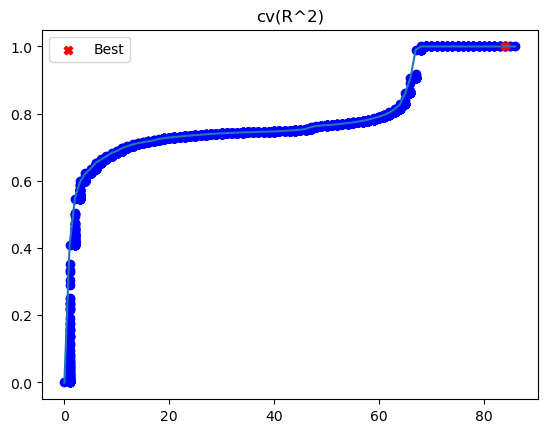

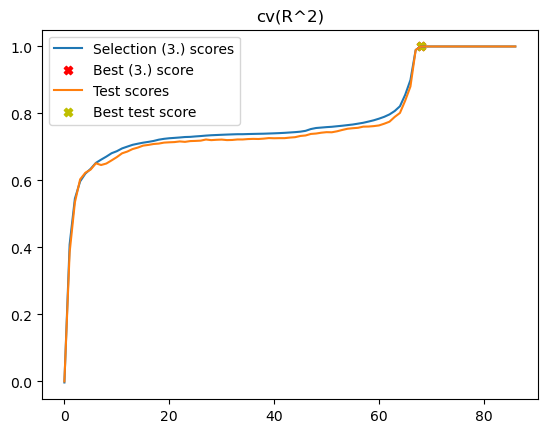

In [79]:
def get_val_evaluator(scorer, val_size=0.3):
    def evaluator(model, X, y, trained=False):
        X_train_small, X_val, y_train_small, y_val = train_test_split(X, y, 
                                                                      test_size=val_size,
                                                                      random_state=mpg_test_seed)
        
        if not trained:
            model = model.fit(X_train_small, y_train_small)
        score = scorer(model, X_val, y_val) 
        
        return model, score
    
    return evaluator

def get_cv_evaluator(scorer, cv=3):
    def evaluator(model, X, y, trained=False):            
        scores = cross_val_score(model, X, y, scoring=scorer, cv=cv)
        if not trained:
            model = model.fit(X, y)
        return model, np.mean(scores)
    
    return evaluator


cv = 10
sigma = estimate_sigma(X_train_pd, y_train)
forward_selection(X_train_pd, y_train, X_test_pd, y_test,
                  get_evaluator(make_scorer(r2_score)), np.argmax, # 2.b
                  # Use either 5-fold CV or (1-fold cross) validation to 
                  # estimate the test R^2 error at step (3.) of the algorithm
                  get_cv_evaluator(make_scorer(r2_score), cv=cv), np.argmax, # 3.
                  get_evaluator(make_scorer(r2_score)), np.argmax, # test
                  candidates_scorer_name="cv(R^2)",
                  subsets_scorer_name="cv(R^2)",
                  verbose=True, weight_step3=10)

In [124]:
training

,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,DNAtype_1,DNAtype_11,DNAtype_12,DNAtype_2,DNAtype_3,DNAtype_4,DNAtype_5,DNAtype_6,DNAtype_7,DNAtype_9
0,207343,6686,Bovine foamy virus,0.01541,0.00927,0.01720,0.01825,0.01436,0.02303,0.01555,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7629,10060,Anthocidaris crassispina,0.01213,0.02515,0.00268,0.01352,0.01372,0.01143,0.00775,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,320850,14031,Staphylococcus phage X2,0.02580,0.01618,0.03606,0.01354,0.00848,0.02067,0.01041,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1397,39839,Bacillus circulans,0.00128,0.02141,0.01225,0.01649,0.01330,0.01308,0.00399,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,50790,5112,mitochondrion Dascyllus trimaculatus,0.03169,0.01780,0.03893,0.00000,0.06240,0.01056,0.05262,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10417,332388,1791,Pyrus pyrifolia var. culta,0.02289,0.02959,0.00614,0.02680,0.01452,0.02178,0.00558,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10418,374598,68352,Eastern equine encephalitis virus,0.02532,0.01557,0.00878,0.01185,0.01160,0.02654,0.00979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10419,267998,2292,Rhizobium sp. MTP-10005,0.01614,0.02618,0.00131,0.01003,0.02661,0.01658,0.00218,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10420,175050,1022,chloroplast Primula chungensis,0.00196,0.01761,0.04501,0.03131,0.02544,0.00978,0.01761,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [138]:
training = training.drop(["SpeciesID", "SpeciesName"], axis = 1)
y_train = training['AGA'].to_numpy()

training = training.drop(["AGA"], axis = 1)
column_names_train = training.columns.tolist()
X_train = training[column_names_train].to_numpy()


In [139]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

# Define the range of regularization strengths (C values)
C_vals = np.linspace(1e-4, 0.5, 100)

# Initialize a list to store coefficients for each feature at each C value
betas = []

# Standardize the features
X_std = preprocessing.scale(X_train)

# Loop over each C value
for C in C_vals:
    # Create and fit the logistic regression model with L1 regularization
    model = LogisticRegression(solver='saga', penalty='l1', C=C)
    model.fit(X_std, y_train) 
    
    # Collect the coefficients (betas)
    beta = model.coef_.reshape(-1)
    betas.append(beta)

# Stack the betas to create a matrix of shape [Nfeat, NCvals]
betas = np.stack(betas, axis=1)  

# Plot the coefficients for each feature as a function of C
for beta, name in zip(betas, X_full_feat):
    plt.plot(C_vals, beta, label=name)

plt.legend()
#plt.xlabel("C = 1/lambda")
#plt.ylabel("Beta")
plt.title("Coefficient Paths for Logistic Regression with L1 Regularization")
plt.show()

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

# PCA

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X contains your data matrix
X = training.iloc[:, 5:]
# Assuming y contains your target labels
y = training.loc[:, "Kingdom"]
# Perform PCA for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print(sum(pca.explained_variance_ratio_))

# Plot the data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis')
plt.title('PCA Visualization of Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Target Class')
plt.show()

KeyError: 'Kingdom'